# Table of Contents
1. Basic Statistics 
2. World
## 3. USA
4. Individual City in USA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import geopandas as gpd
import plotly.express as px
from matplotlib.lines import Line2D
from math import pi

# 3. USA

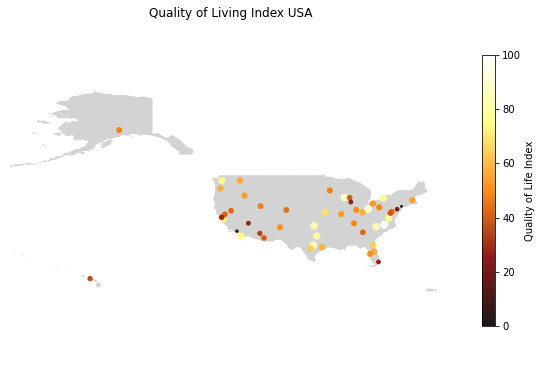

In [3]:
## Dot plot cities with variable colors on the map

# choose year
year = 2022

# importing scaled data

qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_us_yr = qol_us.loc[(qol_us['Year'] == year)]


# importing map 
usa = gpd.read_file('tl_2021_us_state.shp')
usa.head()

# Creating axes and plotting USA map
ax = usa.plot(color='lightgrey', figsize=(10, 10))
usa.plot(color='lightgrey', ax=ax)

# Plotting Quality of Life index data with a color map
x = qol_us_yr['Longitude']
y = qol_us_yr['Latitude']
z = qol_us_yr['Quality of Life Index']
plt.scatter(x, y, s=0.5*z, c=z, alpha=0.9, vmin=0, vmax=100, cmap='afmhot')
plt.colorbar(label='Quality of Life Index', shrink=.5)

# Creating axis limits and title
plt.xlim([-180, -60])
plt.ylim([0, 90])
plt.title('Quality of Living Index USA')

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()

In [65]:
## basic statistics (unscaled)

# choose year
year = 2022

# importing data
qol = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_original_geo.csv')
qol_us = qol[(qol['Country'] == 'United States') & (qol['Year'] == year)]

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_us[cols_indexes].describe().round(decimals=2).T

count    mean    std     min     25%     50%  \
Quality of Life Index            51.0  173.02  16.31  132.98  164.26  171.89   
Purchasing Power Index           51.0  124.35  19.96   82.63  112.04  124.83   
Safety Index                     51.0   48.05  10.73   24.96   41.35   49.71   
Healthcare Index                 51.0   70.24   6.01   56.10   64.98   70.59   
Cost of Living Index             51.0   74.38   9.54   62.59   67.80   71.56   
Property Price to Income Ratio   51.0    4.09   1.99    1.39    2.51    3.77   
Traffic Commute Time Index       51.0   34.15   8.08   21.96   27.19   34.21   
Pollution Index                  51.0   38.56  11.95   16.20   28.86   38.65   
Climate Index                    51.0   76.40  13.47   41.61   66.79   77.98   

                                   75%     max  
Quality of Life Index           183.06  207.78  
Purchasing Power Index          135.60  172.98  
Safety Index                     54.56   67.29  
Healthcare Index                 75.02   81.26  
Cost of Living Index             77.94  103.65  
Property Price to Income Ratio    5.23    9.94  
Traffic Commute Time Index       39.62   61.07  
Pollution Index                  45.64   67.59  
Climate Index                    85.61   97.26

In [66]:
## basic statistics (unscaled)

# choose year
year = 2022

# importing data
qol = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_us = qol[(qol['Country'] == 'United States') & (qol['Year'] == year)]

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_us[cols_indexes].describe().round(decimals=2).T

count   mean    std  min    25%    50%    75%  \
Quality of Life Index            51.0  53.52  21.81  0.0  41.82  52.02  66.95   
Purchasing Power Index           51.0  46.18  22.09  0.0  32.56  46.71  58.63   
Safety Index                     51.0  54.55  25.35  0.0  38.72  58.47  69.93   
Healthcare Index                 51.0  56.18  23.90  0.0  35.31  57.59  75.18   
Cost of Living Index             51.0  71.29  23.24  0.0  62.62  78.15  87.31   
Property Price to Income Ratio   51.0  68.45  23.32  0.0  55.09  72.16  86.90   
Traffic Commute Time Index       51.0  68.84  20.66  0.0  54.85  68.68  86.63   
Pollution Index                  51.0  56.48  23.25  0.0  42.70  56.31  75.36   
Climate Index                    51.0  62.51  24.21  0.0  45.25  65.35  79.07   

                                  max  
Quality of Life Index           100.0  
Purchasing Power Index          100.0  
Safety Index                    100.0  
Healthcare Index                100.0  
Cost of Living Index            100.0  
Property Price to Income Ratio  100.0  
Traffic Commute Time Index      100.0  
Pollution Index                 100.0  
Climate Index                   100.0

In [4]:
## average of indexes over years - unscaled numbers

# importing data
qol = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_original_geo.csv')
qol_us = qol[qol['Country'] == 'United States']

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_avg_us = qol_us.groupby(['Year'])[cols_indexes].mean().round(decimals=1)

qol_avg_us

Quality of Life Index  Purchasing Power Index  Safety Index  \
Year                                                                
2018                  172.9                   129.1          50.4   
2019                  176.0                   128.8          49.7   
2020                  172.8                   122.8          50.0   
2021                  166.0                   107.7          48.0   
2022                  173.0                   124.3          48.1   

      Healthcare Index  Cost of Living Index  Property Price to Income Ratio  \
Year                                                                           
2018              69.3                  77.4                             4.5   
2019              70.1                  73.2                             4.0   
2020              69.9                  74.6                             3.9   
2021              70.0                  75.4                             4.1   
2022              70.2                  74.4                             4.1   

      Traffic Commute Time Index  Pollution Index  Climate Index  
Year                                                              
2018                        38.0             40.3           79.4  
2019                        35.2             38.1           77.9  
2020                        35.7             38.9           77.6  
2021                        34.5             38.5           76.6  
2022                        34.1             38.6           76.4

In [14]:
## average of indexes over years - scaled numbers

# importing scaled data
qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_avg_us = qol_us.groupby(['Year'])[cols_indexes].mean().round(decimals=1)

qol_avg_us

Quality of Life Index  Purchasing Power Index  Safety Index  \
Year                                                                
2018                   49.3                    52.1          48.3   
2019                   51.5                    48.9          46.1   
2020                   55.3                    57.7          53.4   
2021                   58.6                    51.2          53.5   
2022                   53.5                    46.2          54.5   

      Healthcare Index  Cost of Living Index  Property Price to Income Ratio  \
Year                                                                           
2018              49.2                  57.7                            69.4   
2019              60.4                  67.0                            76.9   
2020              55.7                  66.2                            76.2   
2021              52.2                  66.5                            69.7   
2022              56.2                  71.3                            68.4   

      Traffic Commute Time Index  Pollution Index  Climate Index  
Year                                                              
2018                        41.8             54.1           61.2  
2019                        51.8             54.4           59.6  
2020                        66.4             52.5           64.7  
2021                        67.5             55.9           62.9  
2022                        68.8             56.5           62.5

In [15]:
## getting national average of indexes for each year and add them to previous table

# importing scaled data

qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')


cols = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_us_avg = qol_us.groupby(['Year'])[cols].mean().round(decimals=1)

# getting percentage change of the national average
avg_chg = []

for i in range(len(cols)):
    avg_chg.append(
     (qol_us_avg[cols[i]].tolist()[-1] - 
      qol_us_avg[cols[i]].tolist()[0])/
        qol_us_avg[cols[i]].tolist()[0]*100
    )
    
qol_avg_us.loc[len(qol_avg_us)] = avg_chg 

qol_avg_us.rename(index={len(qol_avg_us)-1:'pct_change (over 5yr)'}, inplace=True)

qol_avg_us.round(decimals=1)

Quality of Life Index  Purchasing Power Index  \
Year                                                                   
2018                                    49.3                    52.1   
2019                                    51.5                    48.9   
2020                                    55.3                    57.7   
2021                                    58.6                    51.2   
2022                                    53.5                    46.2   
pct_change (over 5yr)                    8.5                   -11.3   

                       Safety Index  Healthcare Index  Cost of Living Index  \
Year                                                                          
2018                           48.3              49.2                  57.7   
2019                           46.1              60.4                  67.0   
2020                           53.4              55.7                  66.2   
2021                           53.5              52.2                  66.5   
2022                           54.5              56.2                  71.3   
pct_change (over 5yr)          12.8              14.2                  23.6   

                       Property Price to Income Ratio  \
Year                                                    
2018                                             69.4   
2019                                             76.9   
2020                                             76.2   
2021                                             69.7   
2022                                             68.4   
pct_change (over 5yr)                            -1.4   

                       Traffic Commute Time Index  Pollution Index  \
Year                                                                 
2018                                         41.8             54.1   
2019                                         51.8             54.4   
2020                                         66.4             52.5   
2021                                         67.5             55.9   
2022                                         68.8             56.5   
pct_change (over 5yr)                        64.6              4.4   

                       Climate Index  
Year                                  
2018                            61.2  
2019                            59.6  
2020                            64.7  
2021                            62.9  
2022                            62.5  
pct_change (over 5yr)            2.1

In [8]:
## Top US cities of high Quality of Life index

# choose year and number
year = 2022
num = 10 #top10

# importing scaled data
qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_us_yr = qol_us[qol_us['Year']== year]

cols_indexes = ['City', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

top_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).head(num)
top_us = top_us[cols_indexes].round(decimals=1)

# reset index so that index start from 1
top_us.index = np.arange(1, len(top_us)+1)

top_us

City  Quality of Life Index  Purchasing Power Index  \
1         Raleigh                  100.0                    68.1   
2        Columbus                   91.5                    76.0   
3         Madison                   88.5                    54.8   
4          Austin                   88.1                    83.7   
5       Charlotte                   86.0                    68.9   
6   Oklahoma City                   84.5                    50.2   
7        Richmond                   80.4                    53.5   
8          Dallas                   79.8                    97.4   
9         Buffalo                   77.6                    46.2   
10        Seattle                   75.7                    69.5   

    Safety Index  Healthcare Index  Cost of Living Index  \
1           95.8              77.7                  86.3   
2           74.7              70.9                  82.7   
3           97.0              86.2                  88.5   
4           89.7              59.4                  90.5   
5           70.3              73.6                  81.8   
6           60.8              78.2                  94.3   
7           67.4              70.6                  87.4   
8           58.5              40.1                  87.2   
9           72.1              82.8                  71.5   
10          58.1              71.2                  36.8   

    Property Price to Income Ratio  Traffic Commute Time Index  \
1                             80.6                        72.3   
2                             69.5                        92.4   
3                             75.1                        94.3   
4                             75.0                        68.7   
5                             86.9                        67.3   
6                             82.6                        92.2   
7                             67.7                       100.0   
8                             91.5                        66.2   
9                             98.5                        95.3   
10                            63.4                        49.1   

    Pollution Index  Climate Index  
1              88.9           76.0  
2              81.0           53.3  
3              94.6           18.0  
4              60.5           72.7  
5              76.2           76.3  
6              88.7           64.7  
7              70.9           71.3  
8              50.6           72.3  
9              77.4           44.6  
10             75.4           90.1

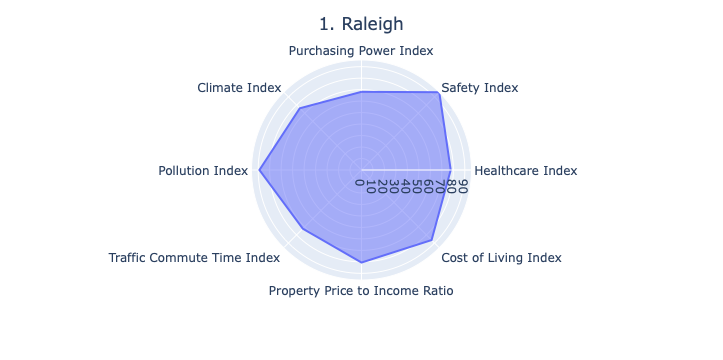

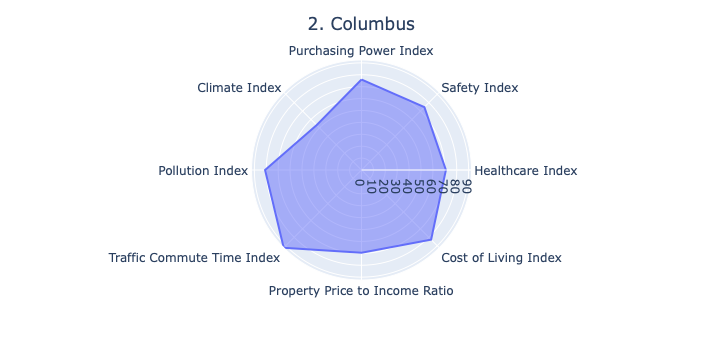

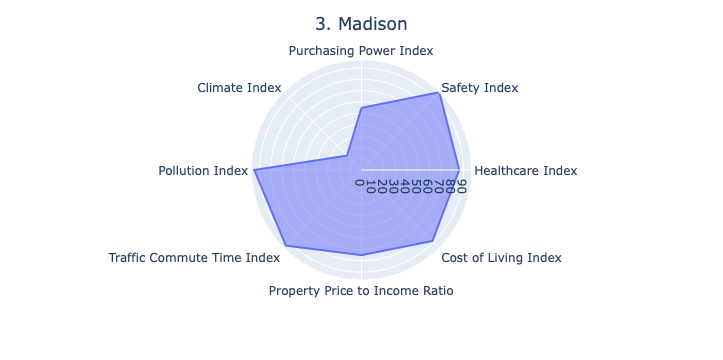

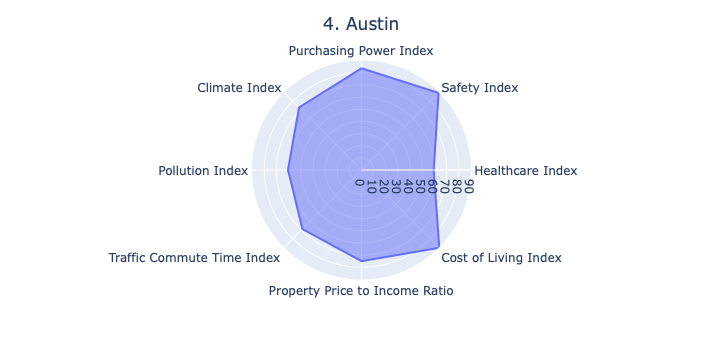

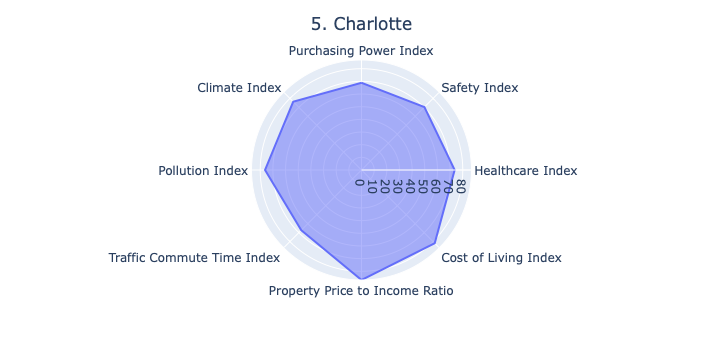

In [9]:
## spider chart for top US cities

# choose year and number
year = 2022
num = 5 #top10

# importing scaled data
qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_us_yr = qol_us[qol_us['Year']== year]


top_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).head(10)

top_us = top_us[['City','Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']].round(decimals=1).set_index('City')

indexes_for_chart = ['Purchasing Power Index', 'Safety Index', 'Healthcare Index', 'Cost of Living Index',
                     'Property Price to Income Ratio', 'Traffic Commute Time Index',
                     'Pollution Index','Climate Index']

# plotting on spider chart
for i in range(num):
    df = pd.DataFrame(dict(
    r= top_us[indexes_for_chart].iloc[i],
    theta=indexes_for_chart))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title_text= str(i+1) + '.' + ' ' + top_us.index[i], title_x=0.5)
    fig.show()

In [63]:
## Bottom US cities of Quality of Life index

# choose year and number
year = 2022
num = 5 # bottom 5

# importing scaled data
qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_us_yr = qol_us[qol_us['Year']== year]

cols_indexes = ['City', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

bottom_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).tail(num)
bottom_us = bottom_us[cols_indexes].round(decimals=1)

# reset index to reflect ranking
bottom_us.index = np.arange(len(qol_us_yr)+1-num, len(qol_us_yr)+1)

bottom_us

City  Quality of Life Index  Purchasing Power Index  Safety Index  \
47         Miami                   28.3                    12.3          52.5   
48  Philadelphia                   24.3                    36.5          29.9   
49   Los Angeles                   12.1                    48.1          59.7   
50      New York                    6.7                    19.2          66.1   
51       Detroit                    0.0                    30.3           0.5   

    Healthcare Index  Cost of Living Index  Property Price to Income Ratio  \
47              29.6                  62.5                            54.0   
48              52.8                  59.6                            69.9   
49              21.2                  59.6                            41.1   
50              25.0                   8.9                             0.0   
51              25.0                  80.3                           100.0   

    Traffic Commute Time Index  Pollution Index  Climate Index  
47                        46.2             54.8           79.2  
48                        53.2             27.4           65.4  
49                         0.0              0.0           96.8  
50                        46.8             18.6           68.4  
51                        40.9             15.9           43.9

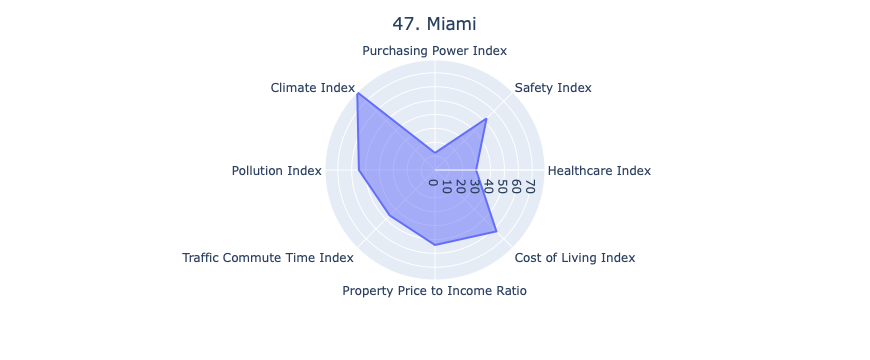

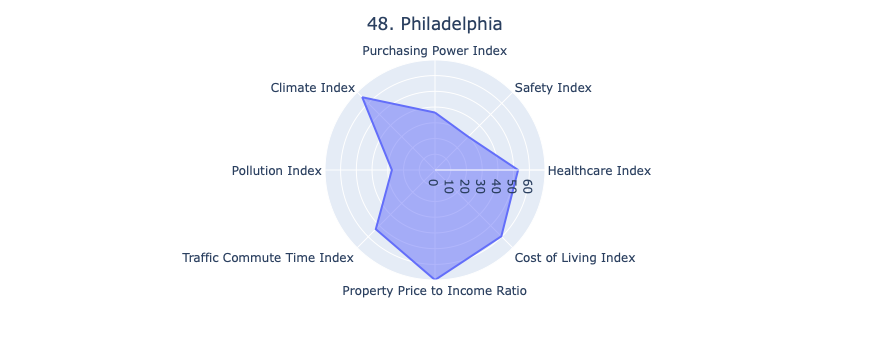

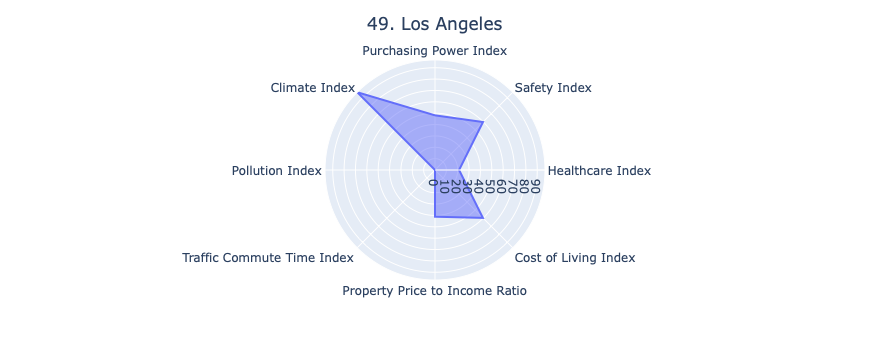

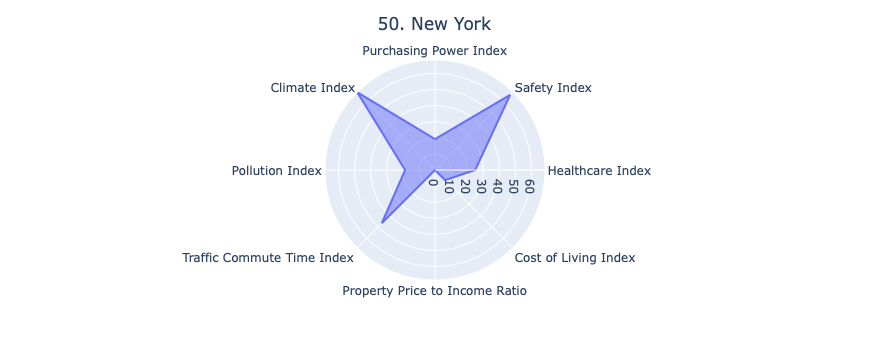

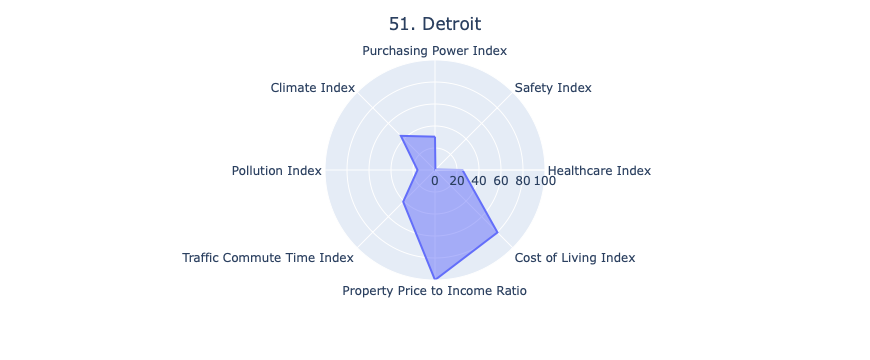

In [33]:
## spider chart for bottom US cities

# choose year and number
year = 2022
num = 5  # bottom5

# importing scaled data
qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_us_yr = qol_us[qol_us['Year']== year]

bottom_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).tail(5)

bottom_us = bottom_us[['City','Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']].round(decimals=1).set_index('City')

indexes_for_chart = ['Purchasing Power Index', 'Safety Index', 'Healthcare Index', 'Cost of Living Index',
                     'Property Price to Income Ratio', 'Traffic Commute Time Index',
                     'Pollution Index','Climate Index']

# plotting on spider chart
for i in range(num):
    df = pd.DataFrame(dict(
    r= bottom_us[indexes_for_chart].iloc[i],
    theta=indexes_for_chart))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(
        title_text= str((len(qol_us_yr)-num+1+i)
                       ) + '.' + ' ' + bottom_us.index[i], title_x=0.5)
    fig.show()